<a href="https://colab.research.google.com/github/Charmaineem/Image-Classifier/blob/main/Image_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Image classifier CNN with ResNet-18 backbone

In [1]:
!pip install -Uqq fastbook

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

In [2]:
import fastbook
fastbook.setup_book()

Mounted at /content/gdrive


In [3]:
from fastbook import *

In [7]:
#Get urls for a German shepherd dog
german_shepherd_urls = search_images_ddg('german shepherd photos', max_images =1)
german_shepherd_urls[0]

'https://i.pinimg.com/originals/bc/36/55/bc3655c42e429adab166d03fae355ebd.jpg'

In [8]:
#Downlaoding the image
from fastdownload import download_url
german_shepherd_img = 'german_shepherd.jpg'
download_url(german_shepherd_urls[0], german_shepherd_img, show_progress=False)

Path('german_shepherd.jpg')

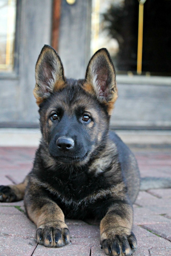

In [9]:
#Displaying the German shepherd
from fastai.vision.all import *
im =Image.open(german_shepherd_img)
im.to_thumb(256,256)


In [10]:
#Shorer way of downloading the German Shepherd images but won't use it in this case
#download_url(search_images_ddg('german shepherd photos', max_images=1)[0], 'german_shepherd.jpg', show_progress=False)
#Image.open('german_shepherd.jpg').to_thumb(256,256)

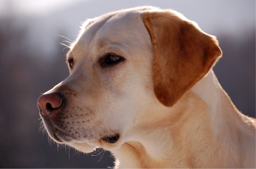

In [12]:
#Getting labrador images
download_url(search_images_ddg('labrador photos', max_images=1)[0], 'labrador.jpg', show_progress=False)
Image.open('labrador.jpg').to_thumb(256,256)

In [13]:
#Getting photos in different lighting
searches = 'german shepherd' , 'labrador'
path = Path('german_shepherd_or_not')
from time import sleep

for o in searches:
  dest = (path/o)
  dest.mkdir(exist_ok=True, parents=True)
  download_images(dest, urls=search_images_ddg(f'{o} photo'))
  sleep(10)
  download_images(dest, urls=search_images_ddg(f'{o} sun photo'))
  sleep(10)
  download_images(dest, urls=search_images_ddg(f'{o} shade photo'))
  sleep(10)
  resize_images(path/o, max_size=400, dest=path/o)

TRAINING THE MODEL

In [14]:
#removing all the failed images
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

24

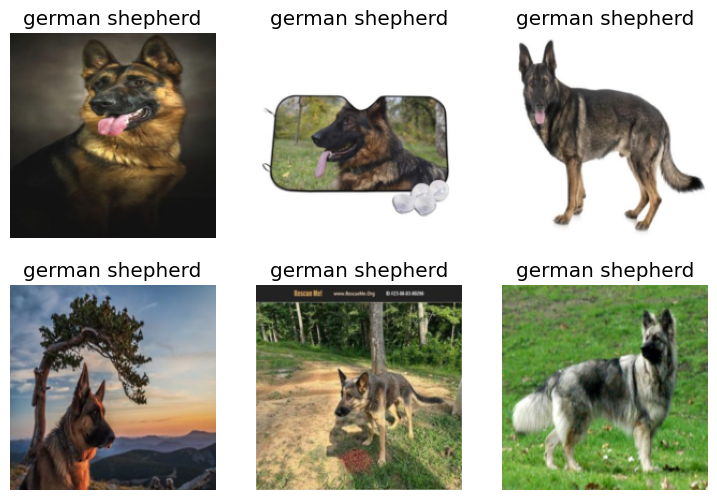

In [15]:
dls= DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items=get_image_files,
    splitter= RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms= [Resize(192, method = 'squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [ ]:
#finetuning the model: ResNet18
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 91.9MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.433727,0.112428,0.027027,02:15


epoch,train_loss,valid_loss,error_rate,time


Testing

In [ ]:
is_german_shepherd,_,probs = learn.predict(PILImage.create('german_shepherd.jpg'))
print(f"This is a: {is_german_shepherd}.")
print(f"Probability it's a german shepherd: {probs[0]:.4f}")

Testing using an image of a cow

In [ ]:
download_url(search_images_ddg('cow photos', max_images=2)[1], 'cow.jpg', show_progress=False)
Image.open('cow.jpg').to_thumb(256,256)

In [ ]:
is_german_shepherd,_,probs = learn.predict(PILImage.create('cow.jpg'))
print(f"This is a: {is_german_shepherd}.")
print(f"Probability it's a german shepherd: {probs[0]:.4f}")